In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from welly import Project, Well
import lasio

In [2]:
import os

project_root = os.getcwd()
raw_data_dir = os.path.join(project_root, "raw_data")
export_dir = os.path.join(project_root, "export")
print(os.path.exists(export_dir))
print(os.path.exists(raw_data_dir))

True
True


# Logging While Drilling F-14
[Depth indexed data](#id1)


[17 1/2" LWD Section](#id11)
[12 1/4" LWD Section](#id12)
[8 1/2" LWD Section](#id13)
[Final Dataframe](#id15)



[Time indexed data](#id2) 



In [39]:
ls  *.LAS 

ls: cannot access '*.LAS': No such file or directory


<a id="id1"></a>
# Depth indexed data
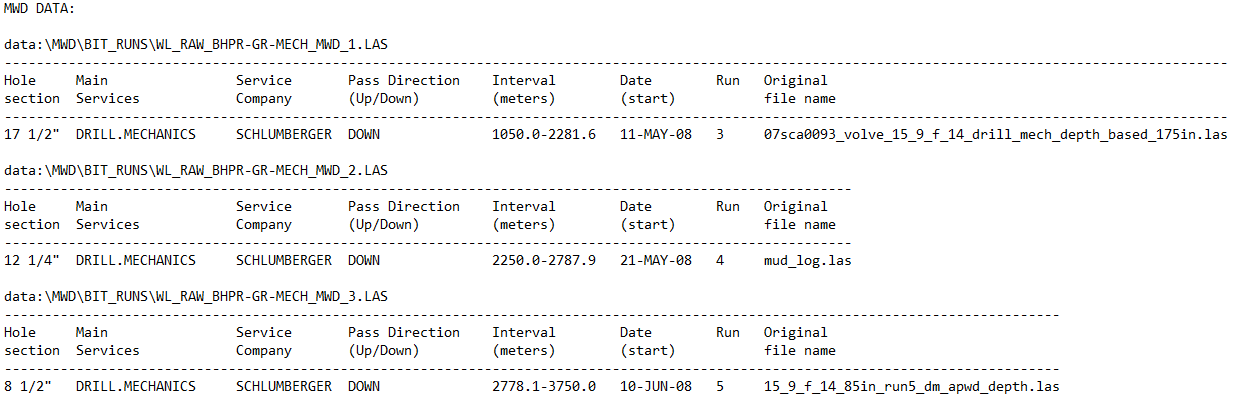

In [40]:
f1 = Project.from_las("WL_RAW_BHPR-GR-MECH_MWD_1.LAS")
f2 = Project.from_las("WL_RAW_BHPR-GR-MECH_MWD_2.LAS")
f3 = Project.from_las("WL_RAW_BHPR-GR-MECH_MWD_3.LAS")

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [41]:
print('17 1/2" Section:') ; f1

17 1/2" Section:


Index,UWI,Data,Curves


In [42]:
print('12 1/4" Section:') ; f2

12 1/4" Section:


Index,UWI,Data,Curves


In [43]:
print('8 1/2" Section:') ; f3

8 1/2" Section:


Index,UWI,Data,Curves


## DataFrame construction & Exploratory Data Analysis
> sec_1 = 17 1/2" Section <br>
> sec_2 = 12 1/4" Section<br>
> sec_3 = 8 1/2" Section

In [44]:
sec_1 = f1.df()
sec_2 = f2.df()
sec_3 = f3.df()

ValueError: No objects to concatenate

In [45]:
print("Common columns between 17.5LWD and 12.25LWD:\t")
np.intersect1d(sec_1.columns, sec_2.columns)

Common columns between 17.5LWD and 12.25LWD:	


NameError: name 'sec_1' is not defined

In [46]:
print("Common columns between 12.25LWD and 8.5LWD:\t")
np.intersect1d(sec_2.columns, sec_3.columns)

Common columns between 12.25LWD and 8.5LWD:	


NameError: name 'sec_2' is not defined

<a id="id11"></a>
## 17 1/2" LWD Section analysis 
> Turn `MiltiIndex`data structure into `RangeIndex` structure

In [ ]:
sec_1.reset_index(inplace=True)  
del sec_1["UWI"]

In [ ]:
print("Depths\n\tInitial :",sec_1["Depth"].min(),"[m]\n\tFinal:",sec_1["Depth"].max(),"[m]")
print("\nTotal depth =",sec_1["Depth"].max()-sec_1["Depth"].min(),"[m]")
print("\nColumns in DataFrame (logs) :")
for col in sec_1.columns: 
    print("\t",col) 

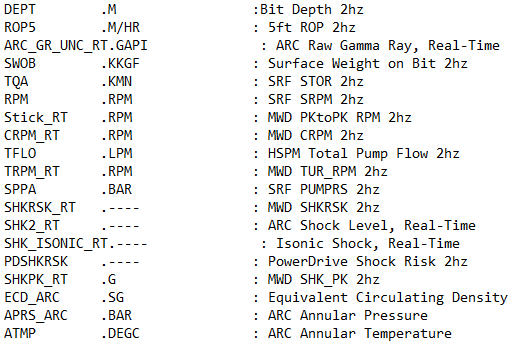

In [ ]:
print("Logs:\n")
sec_1_las = r"WL_RAW_BHPR-GR-MECH_MWD_1.LAS"
sec1_plt = lasio.read(sec_1_las)
fig,axes = plt.subplots(1,len(sec1_plt.keys()), figsize=(20,20))
for i,log in enumerate(sec1_plt.keys()):
    axes[i].plot(sec1_plt[log],sec1_plt['DEPT'])
    axes[i].invert_yaxis()
    axes[i].set_title(log,fontsize=8.5)

In [ ]:
print("Missing data in the LWD data:")
plt.figure(figsize=(15,7))
sns.heatmap(sec_1.isnull(),cbar=False)
plt.show()

In [ ]:
total = sec_1.isna().sum().sort_values(ascending = True)
percent = round(((sec_1.isna().sum()/sec_1.isna().count())*100),2).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
print("Missing data:")
missing_data

<a id="id12"></a>
## 12 1/4" LWD Section analysis 
> LWD Data columns from the 12 1/4" section equals data columns from 8 1/2" section


> Turn `MiltiIndex`data structure into `RangeIndex` structure

In [ ]:
sec_2

In [ ]:
sec_2.reset_index(inplace=True)  
del sec_2["UWI"]

In [ ]:
print("Depths\n\tInitial :",sec_2["Depth"].min(),"[m]\n\tFinal:",sec_2["Depth"].max(),"[m]")
print("\nTotal depth =",sec_2["Depth"].max()-sec_2["Depth"].min(),"[m]")
print("\nColumns in DataFrame (logs) :")
for col in sec_2.columns: 
    print("\t",col) 

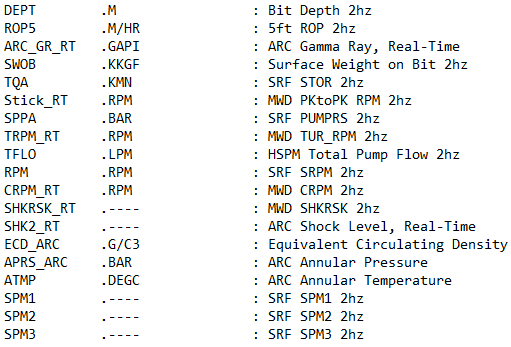

In [ ]:
print("Logs:\n")
sec_2_las = r"WL_RAW_BHPR-GR-MECH_MWD_2.LAS"
sec2_plt = lasio.read(sec_2_las)
fig,axes = plt.subplots(1,len(sec2_plt.keys()), figsize=(20,20))
for i,log in enumerate(sec2_plt.keys()):
    axes[i].plot(sec2_plt[log],sec2_plt['DEPT'])
    axes[i].invert_yaxis()
    axes[i].set_title(log,fontsize=8.5)

In [ ]:
print("Missing data in the LWD data:")
plt.figure(figsize=(15,7))
sns.heatmap(sec_2.isnull(),cbar=False)
plt.show()

In [ ]:
total = 0 ; percent = 0
total = sec_2.isna().sum().sort_values(ascending = True)
percent = round(((sec_2.isna().sum()/sec_2.isna().count())*100),2).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
print("Missing data:")
missing_data

<a id="id13"></a>
## 8 1/2" LWD Section analysis 
> Turn `MiltiIndex`data structure into `RangeIndex` structure

In [ ]:
sec_3.reset_index(inplace=True)  
del sec_3["UWI"]

In [ ]:
print("Depths\n\tInitial :",sec_3["Depth"].min(),"[m]\n\tFinal:",sec_3["Depth"].max(),"[m]")
print("\nTotal depth =",sec_3["Depth"].max()-sec_3["Depth"].min(),"[m]")
print("\nColumns in DataFrame (logs) :")
for col in sec_3.columns: 
    print("\t",col) 

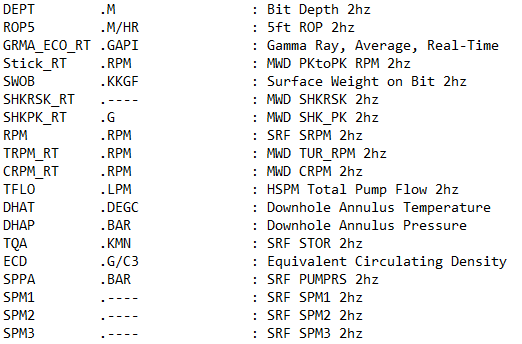

In [ ]:
print("Logs:\n")
sec_3_las = r"WL_RAW_BHPR-GR-MECH_MWD_3.LAS"
sec3_plt = lasio.read(sec_3_las)
fig,axes = plt.subplots(1,len(sec3_plt.keys()), figsize=(20,20))
for i,log in enumerate(sec3_plt.keys()):
    axes[i].plot(sec3_plt[log],sec3_plt['DEPT'])
    axes[i].invert_yaxis()
    axes[i].set_title(log,fontsize=8.5)

In [ ]:
print("Missing data in the LWD data:")
plt.figure(figsize=(15,7))
sns.heatmap(sec_3.isnull(),cbar=False)
plt.show()

In [ ]:
del missing_data ; total = 0 ; percent = 0
total = sec_3.isna().sum().sort_values(ascending = True)
percent = round(((sec_3.isna().sum()/sec_3.isna().count())*100),2).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ["Total ","Percent"])
print("Missing data:")
missing_data

<a id="id15"></a>
## Creating final DataFrame 

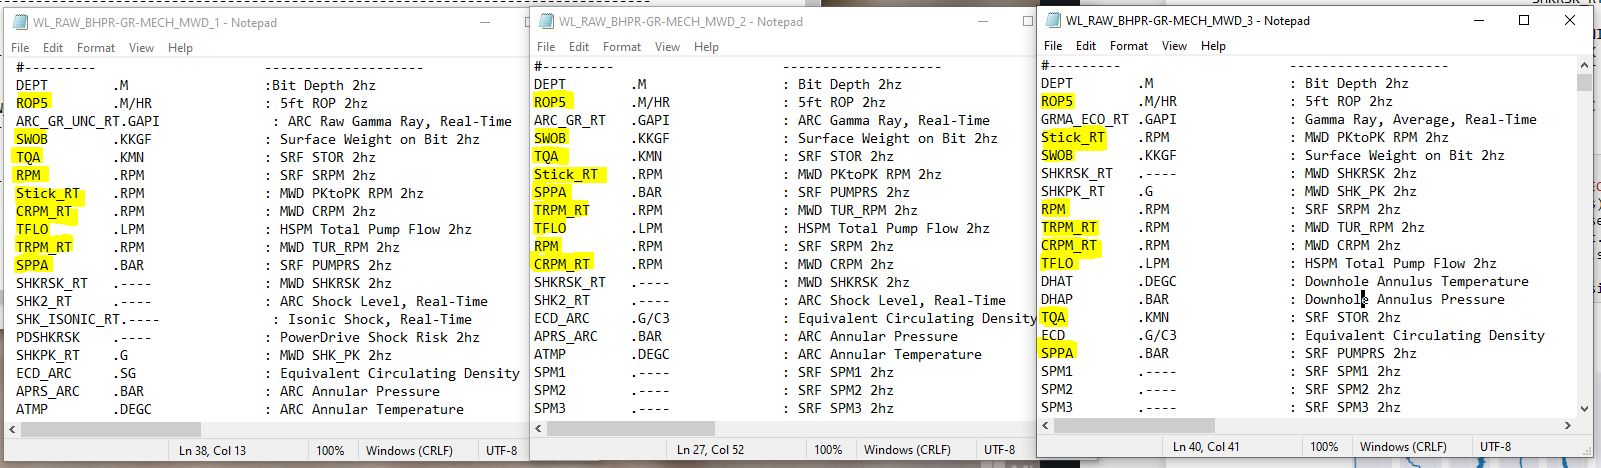

Regardless, the LWD tool in the BHA of each run:
- ArcVision Tool : Sections 17 1/2" & 12 1/4"
- EcoScope Tool : Section 8 1/2"


An stadistical description shall be done to check the possibility of concatenating values of Gamma Ray,Equivalent Density,
Annulus temperature and pressure between the tools

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Gamma Ray Values')
axs[0].boxplot(sec_1["ARC_GR_UNC_RT"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["ARC_GR_RT"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["GRMA_ECO_RT"].dropna())
axs[2].set_title("Section 8")
plt.show() 

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Annulus Pressures')
axs[0].boxplot(sec_1["APRS_ARC"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["APRS_ARC"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["DHAP"].dropna())
axs[2].set_title("Section 8")
plt.show() 

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Annulus Temperature')
axs[0].boxplot(sec_1["ATMP"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["ATMP"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["DHAT"].dropna())
axs[2].set_title("Section 8")
plt.show() 

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10,7),sharey = True)
fig.suptitle('Equivalent Circulating Density')
axs[0].boxplot(sec_1["ECD_ARC"].dropna())
axs[0].set_title("Section 17")
axs[1].boxplot(sec_2["ECD_ARC"].dropna())
axs[1].set_title("Section 12")
axs[2].boxplot(sec_3["ECD"].dropna())
axs[2].set_title("Section 8")
plt.show() 

The shock tools also shall be analized for a complete construction of the final dataframe from section 17 1/2" to 8 1/2", while analyzing with boxplots, the outliers wont let analizing possible, so the python builtup description tool is used 

In [ ]:
print(sec_1["SHK2_RT"].describe())
print(sec_2["SHK2_RT"].describe())
print(sec_3["SHKPK_RT"].describe())

The final result for building the columns, should be as follows:

|Depth|ROP5|GammaRay|SWOB|TQA|RPM|TRPM|CRPM|Stick|SPPA|TFLO|AnTemp|AnPres|TransShock|ECD|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|


from depths : 1050 - 3749[m]

In [ ]:
pre_1 = sec_1[['Depth','ROP5','ARC_GR_UNC_RT','SWOB','TQA','RPM','TRPM_RT','CRPM_RT','STICK_RT','SPPA','TFLO','ATMP','APRS_ARC','SHKRSK_RT','ECD_ARC']]
pre_2 = sec_2[['Depth','ROP5','ARC_GR_RT','SWOB','TQA','RPM','TRPM_RT','CRPM_RT','STICK_RT','SPPA','TFLO','ATMP','APRS_ARC','SHKRSK_RT','ECD_ARC']]
pre_3 = sec_3[['Depth','ROP5','GRMA_ECO_RT','SWOB','TQA','RPM','TRPM_RT','CRPM_RT','STICK_RT','SPPA','TFLO','DHAT','DHAP','SHKRSK_RT','ECD']]

In [ ]:
pre_1 = pre_1.rename(columns={'ARC_GR_UNC_RT':'GammaRay','ATMP':'AnTemp','APRS_ARC':'AnPres','ECD_ARC':'ECD'})
pre_2 = pre_2.rename(columns={'ARC_GR_RT':'GammaRay','ATMP':'AnTemp','APRS_ARC':'AnPres','ECD_ARC':'ECD'})
pre_3 = pre_3.rename(columns={'GRMA_ECO_RT':'GammaRay','DHAT':'AnTemp','DHAP':'AnPres'})

In [ ]:
print("Equal columns between preliminary dataframes:\n")
print(pre_1.columns == pre_2.columns)
print("\n",pre_1.columns == pre_3.columns)

In [ ]:
print("Pre_1\nDepths\n\tInitial :",pre_1["Depth"].min(),"[m]\n\tFinal:",pre_1["Depth"].max(),"[m]")
print("Pre_2\nDepths\n\tInitial :",pre_2["Depth"].min(),"[m]\n\tFinal:",pre_2["Depth"].max(),"[m]")
print("Pre_3\nDepths\n\tInitial :",pre_3["Depth"].min(),"[m]\n\tFinal:",pre_3["Depth"].max(),"[m]")

In [ ]:
pre_2 = pre_2[207:]
pre_2 = pre_2.reset_index(drop=True)

In [ ]:
pre_3 = pre_3[65:]
pre_3 = pre_3.reset_index(drop=True)

In [ ]:
print("\tFinal depths: ")
print("Pre_1\nDepths\n\tInitial :",pre_1["Depth"].min(),"[m]\n\tFinal:",pre_1["Depth"].max(),"[m]")
print("Pre_2\nDepths\n\tInitial :",pre_2["Depth"].min(),"[m]\n\tFinal:",pre_2["Depth"].max(),"[m]")
print("Pre_3\nDepths\n\tInitial :",pre_3["Depth"].min(),"[m]\n\tFinal:",pre_3["Depth"].max(),"[m]")

In [ ]:
frames = [pre_1,pre_2,pre_3]
LWD_F14 = pd.concat(frames)
LWD_F14 = LWD_F14.reset_index(drop=True)

In [36]:
print("Total rows in preliminary dataframes : ",len(pre_1)+len(pre_2)+len(pre_3))

NameError: name 'pre_1' is not defined

In [352]:
LWD_F14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17718 entries, 0 to 17717
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Depth      17718 non-null  float64
 1   ROP5       17694 non-null  float64
 2   GammaRay   10886 non-null  float64
 3   SWOB       17714 non-null  float64
 4   TQA        17714 non-null  float64
 5   RPM        17714 non-null  float64
 6   TRPM_RT    6386 non-null   float64
 7   CRPM_RT    6390 non-null   float64
 8   STICK_RT   6404 non-null   float64
 9   SPPA       17714 non-null  float64
 10  TFLO       17714 non-null  float64
 11  AnTemp     17217 non-null  float64
 12  AnPres     17217 non-null  float64
 13  SHKRSK_RT  6457 non-null   float64
 14  ECD        17217 non-null  float64
dtypes: float64(15)
memory usage: 2.0 MB


In [18]:
# LWD_F14.to_csv(r'C:\Users\Luis Navarro\Desktop\ProgrammingStuff\MachineLearning\Petroleum\Drilling\LWD_F14.csv', index = False)
LWD_F14.to_csv(os.path.join(export, 'LWD_F14.csv'), index = False)

NameError: name 'LWD_F14' is not defined

<a id="id2"></a>
# Time indexed data
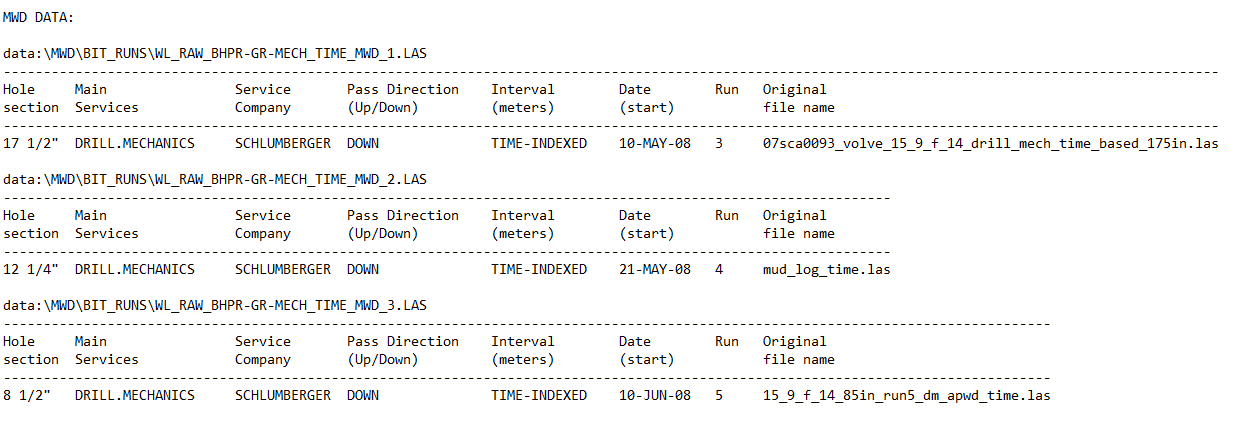
## Welly library import

In [260]:
print("Welly version: ",welly.__version__)

Welly version:  0.4.8


In [261]:
t1 = welly.Well.from_las("WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS",index="existing")

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U9'), dtype('<U9')) -> dtype('<U9')

In [267]:
from welly import Well
w = Well.from_las('WL_RAW_BHPR-GR-MECH_TIME_MWD_1.LAS')

LASUnknownUnitError: Unit of depth index not known

## To analyze this logs, intermediate procedure must be done also further analysis and research is needed